In [2]:
import os
# os.chdir(r'C:\Users\morel.DESKTOP-PJ169O3\Documents\TravailDeRecherche\Library')
from pathlib import Path
import numpy as np
import torch
import matplotlib.pyplot as plt

from scatcov.frontend import *

/home/ali/GATechBundle/Miniconda3/envs/fac-vae/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Generate Synthetic Data

Data saving dir: MRW_T_2049_none_H_5_0e_01_la_2_0e_01
MRW: generating data.
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01/69613042.npy
Saved: MRW_T_2049_none_H_5_0e_01_la_2_0e_01


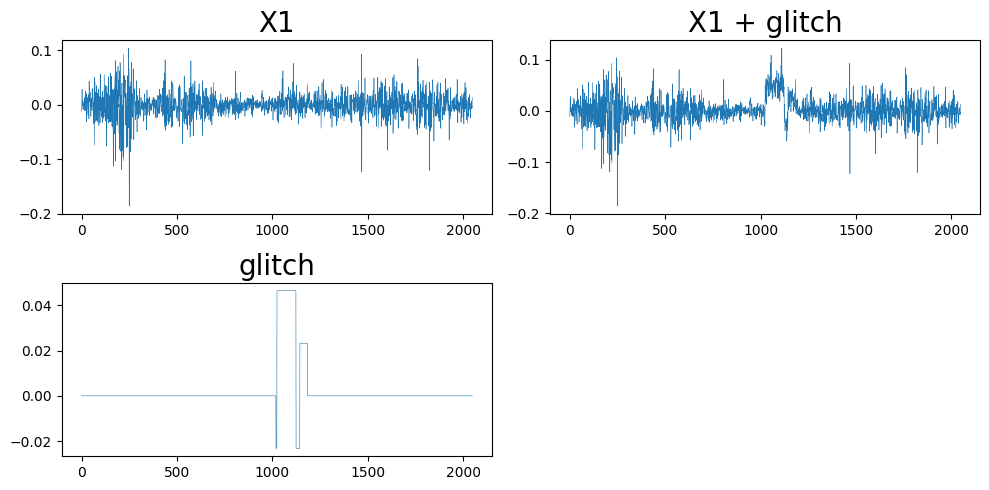

In [3]:
# sum two signals X1 + X2 where X2 is a "glitch"

T = 2 ** 11

# X1: background noise signal
X1 = load_data(process_name="mrw", R=1, T=T+1, H=0.5, lam=0.2)[0, 0, :]
X1 = X1[1:] - X1[:-1]

# X2: transient localized event, a "glitch"
X2 = np.zeros(T)
X2[T//2-5:T//2] = -1
X2[T//2:T//2+100] = 2
X2[T//2+100:T//2+120] = -1
X2[T//2+120:T//2+160] = 1
X2 /= (X2**2).mean()**0.5
X2 *= 0.5 * np.std(X1)

# plot
plt.figure(figsize=(10,5))
plt.subplot2grid((2,2), (0, 0))
plt.plot(X1, linewidth=0.4)
plt.title('X1', fontsize=20)

plt.subplot2grid((2,2), (1, 0))
plt.plot(X2, linewidth=0.4)
plt.title('glitch', fontsize=20)

plt.subplot2grid((2,2), (0, 1))
plt.plot(X1 + X2, linewidth=0.4)
plt.title('X1 + glitch', fontsize=20)

plt.tight_layout()

# Deglitch through gradient descent

In [4]:
# starting point
x0 = X1 + X2

# x_deglitched is an candidate for X1
# x_deglitched starts from X1 + X2 and tries to match the statistics of X1
x_deglitched = generate(X1, x0=(X1+X2)[None,None,:], 
                        J=8, it=1000, tol_optim=5e-4)[0,0,:]


Data saving dir: gen_scat_cov_battle_lemarie_B1_N1_T2048_J[8, 8]_Q1_1_Q2_1_rmax2_model_cov_tol5_00e_04_it1000
gen_scat_cov: generating data.
Initialize model
Preparing target representation
Embedding: uses 174 coefficients spars=8 mean=1 ps=9 phaseenv=36 envelope=120
     3it in 0:00:00.26 ( 11.60it/s ) .... err 8.48E-02 -- max 5.04E-01 -- maxpct 666.749% -- gerr 4.43E-02

 -- spars           max 6.09e-02 -- meanpct 3.00% -- maxpct 8.3%, 
 -- mean            max 2.41e-01 -- meanpct 88.68% -- maxpct 88.7%, 
 -- ps              max 5.04e-01 -- meanpct 15.07% -- maxpct 50.4%, 
 -- phaseenv        max 2.21e-01 -- meanpct 58.37% -- maxpct 666.7%, 
 -- envelope        max 2.92e-01 -- meanpct 11.73% -- maxpct 394.1%, 
     6it in 0:00:00.36 ( 16.53it/s ) .... err 4.87E-02 -- max 1.96E-01 -- maxpct 401.566% -- gerr 6.17E-03

 -- spars           max 1.41e-01 -- meanpct 4.03% -- maxpct 16.0%, 
 -- mean            max 1.96e-01 -- meanpct 72.24% -- maxpct 72.2%, 
 -- ps              max 1.69e-01 -

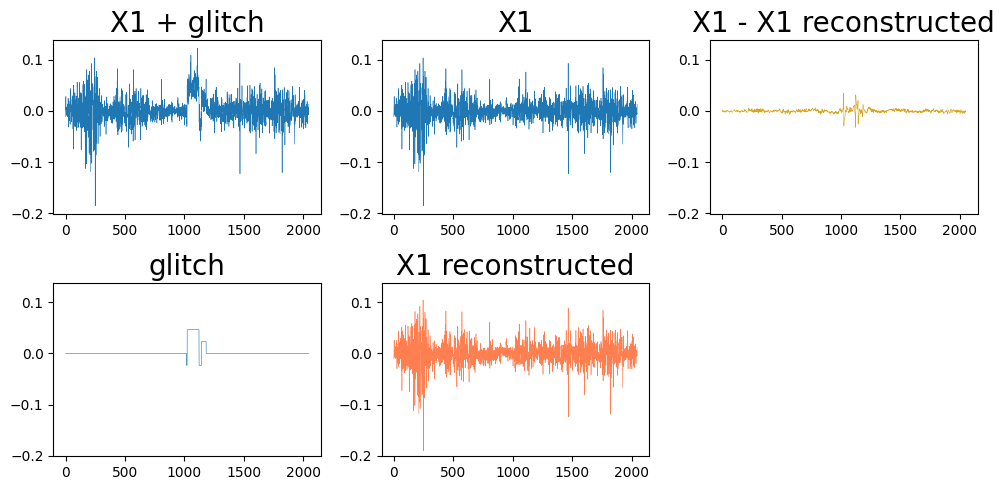

In [5]:
# ploting
plt.figure(figsize=(10,5))

ax = plt.subplot2grid((2, 3), (0, 0))
plt.plot(X1 + X2, linewidth=0.4)
plt.title('X1 + glitch', fontsize=20)
lim = ax.get_ylim()

plt.subplot2grid((2, 3), (1, 0))
plt.plot(X2, linewidth=0.4)
plt.title('glitch', fontsize=20)
plt.ylim(lim)

plt.subplot2grid((2, 3), (0, 1))
plt.plot(X1, linewidth=0.4)
plt.title('X1', fontsize=20)
plt.ylim(lim)

ax = plt.subplot2grid((2, 3), (1, 1))
plt.plot(x_deglitched, linewidth=0.4, color='coral')
plt.title('X1 reconstructed', fontsize=20)
plt.ylim(lim)

plt.subplot2grid((2, 3), (0, 2))
plt.plot(X1 - x_deglitched, linewidth=0.4, color='goldenrod')
plt.title('X1 - X1 reconstructed', fontsize=20)
plt.ylim(lim)
# plt.ylim(-0.1,0.13)


plt.tight_layout()